In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

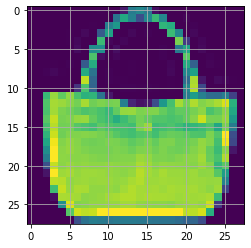

In [5]:
plt.figure()
plt.imshow(train_images[100])
plt.grid(True)

In [6]:
# Number of available GPUs to tensorflow
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [7]:
# Number of available CPUs to tensorflow
print("Num CPUs Available: ", len(tf.config.list_physical_devices('CPU')))

Num CPUs Available:  1


In [8]:
train_images = train_images / 255.0
print(train_images.shape)
test_images = test_images / 255.0
print(test_images.shape)


(60000, 28, 28)
(10000, 28, 28)


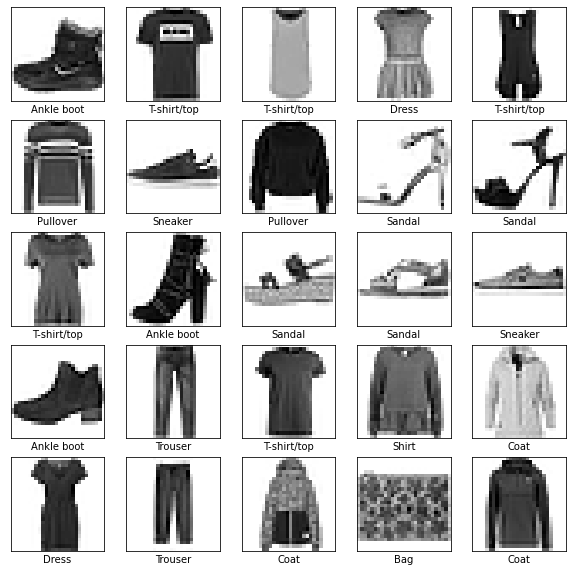

In [9]:
%matplotlib inline

plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5,5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

Explicacion del funcionamiento de las capas que usamos.

La primera capa de esta red, tf.keras.layers.Flatten, transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles). Observe esta capa como una capa no apilada de filas de pixeles en la misma imagen y alineandolo. Esta capa no tiene parametros que aprender; solo reformatea el set de datos.

Despues de que los pixeles estan “aplanados”, la secuencia consiste de dos capastf.keras.layers.Dense. Estas estan densamente conectadas, o completamente conectadas. La primera capa Dense tiene 128 nodos (o neuronas). La segunda (y ultima) capa es una capa de 10 nodos softmax que devuelve un arreglo de 10 probabilidades que suman a 1. Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.


In [10]:
model = keras.Sequential(
  [
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
  ]
)

In [11]:
model.compile(
  optimizer = tf.optimizers.Adam(),
  loss = 'sparse_categorical_crossentropy',
  metrics = ['accuracy']
)

In [12]:
model.fit(
  train_images,
  train_labels,
  epochs = 5
)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6198 - accuracy: 0.7853
Epoch 2/5
1875/1875 [==============================] - 25s 14ms/step - loss: 0.3867 - accuracy: 0.8607
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3354 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3083 - accuracy: 0.8870
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2879 - accuracy: 0.8936


In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3585 - accuracy: 0.8708
Accuracy 0.8708000183105469


La arquitectura de red mostrada en clase no corresponde a una red neuronal convolucional, solo se muestran tres capas, la primera aplica el flatten necesario para las dos siguiente capas que realizan la siguiente operación:

```python
output = activation(dot(input, kernel) + bias)
```

Que es la multiplicación de matrices típica de las capas lineales de una red neuronal.

Pensaba que en la siguiente clase irían a corregir lo dicho en esta o implementar la convolución con el fin de generar conclusiones a modo de comparativa, pero no. Por lo tanto no entiendo el motivo de explicar esto como redes neuronales convolucionales.


Por si quedan dudas de los conceptos:
“Loss function —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
Optimizer — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.
Metrics — Se usan para monitorear los pasos de entrenamiento y de pruebas. El siguiente ejemplo usa accuracy (exactitud) , la fraccion de la imagenes que son correctamente clasificadas.”(TensorFlow)
[Keras clasificacion](https://www.tensorflow.org/tutorials/keras/classification)


In [ ]:
predictions = model.predict(test_images)

In [ ]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'blue'
  else:
    color= 'red'

  plt.xlabel('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color = color)
